In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
xr.set_options(keep_attrs=True)

from Functions import *

In [2]:
b= 0.023
zR = b / 2     # [m] Rayleigh Range
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus
PXe = 25

pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : zR,           # [m] Rayleigh range
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9}     # [s] single pulse length

harm_params = {'sigma' : 1.5e-50,
            'chi3' : 1.5e-35,
            'PXe' : PXe}
params = {**pulse_params, **harm_params}
initial_vals = (nonzero, nonzero)

zstart = -0.2
zstop = 0.2
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, 1000,dtype = np.longdouble))

rstop = 5*omega0
r = np.linspace(0,rstop,10,dtype = np.longdouble)

#sol = solve_diff_eq(dA118_dz_GBNA,params,zrange, initial_vals,z,r)


    

In [3]:
# plt.scatter(r,sol.beam_118.data[:,500])
# plt.show()
# plt.scatter(r,sol.beam_118.data[:,950])
# plt.ylim(1.6e18,2.2e18)
# plt.xlim(0,5*omega0)
# plt.show()


# Z,R = np.meshgrid(z,r)
# plt.contourf(Z,R,sol.beam_118.data,64)

# plt.ylim(0,5*omega0)
# plt.xlim(zstart,zstop)
# plt.xlabel('z (m)')
# plt.ylabel('r (m)')
# plt.title("$|A_{118}|$")
# plt.colorbar()
# plt.show()

In [4]:
# rstop = 6*omega0
# r = np.linspace(0,rstop,10,dtype = np.longdouble)

# sol_2 = solve_diff_eq(dA118_dz_GBNA,params,zrange, initial_vals,z,r)

In [5]:
# plt.scatter(r,sol.beam_118.data[:,950])
# plt.ylim(1.6e18,2.2e18)
# plt.xlim(0,5*omega0)
# plt.scatter(r,sol_2.beam_118.data[:,950])
# plt.legend(['$5 \omega_0$','$6 \omega0$'])
# plt.show()

# Z,R = np.meshgrid(z,r)
# plt.contourf(Z,R,sol_2.beam_118.data,64)

# plt.ylim(0,6*omega0)
# plt.xlim(zstart,zstop)
# plt.xlabel('z (m)')
# plt.ylabel('r (m)')
# plt.title("$|A_{118}|$")
# plt.colorbar()
# plt.show()

## Interpolation Hypothesis

In [6]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_0 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_0[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_0)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=0')



In [7]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_4 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_4[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(4*omega0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_4)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=4omega0')


In [8]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_0 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_0[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_0)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=0 with Gaussian Quadrature')



In [9]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_4 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_4[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(4*omega0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_4)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=4omega0 with Gaussian Quadrature')



In [10]:
# dk = 2/b
# ReJ3= np.zeros(len(z))
# index = 0
# for zval in z:
#     ReJ3[index]= ReJ3_gauss_quad(zval,zstart,dk,params)
#     index += 1

# ImJ3= np.zeros(len(z))
# index = 0
# for zval in z:
#     ImJ3[index]= ImJ3_gauss_quad(zval,zstart,dk,params)
#     index += 1    

In [11]:
# dk = 2/b
# plt.plot(z,evalRef(z,2/b,params))
# plt.title('$Ref(z)$')
# plt.show()
# plt.plot(z,ReJ3)
# plt.title('$ReJ_3$')
# plt.show()

# plt.plot(z,evalImf(z,2/b,params))
# plt.title('$Imf(z)$')
# plt.show()
# plt.title('$ImJ_3$')
# plt.plot(z,ImJ3)

## Cosine Term

### Arctan2

In [12]:

Phi = np.zeros(len(z))
index = 0
for zval in z:
    Phi[index]=phi3_gauss_quad(zval,zstart,2/b,params)
    index += 1


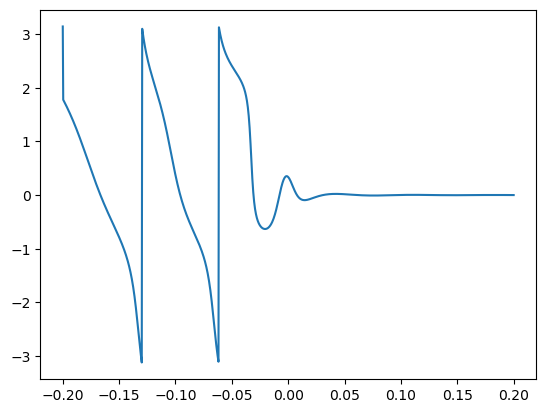

In [13]:
plt.plot(z,Phi)

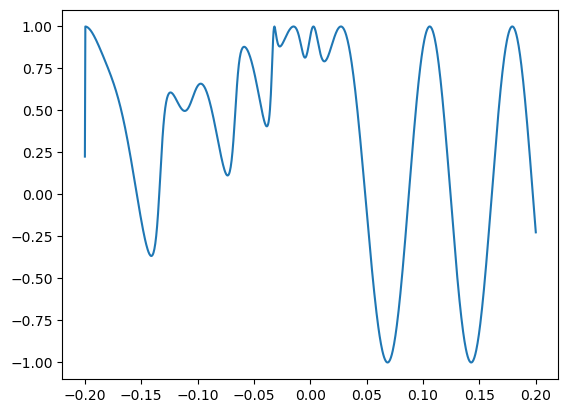

In [14]:
CosTerm = np.cos((2*z/b)-2*np.arctan2(2*z/b,1)+Phi)
plt.plot(z,CosTerm)


### Arctan1

In [15]:

Phi_arctan1 = np.zeros(len(z))
index = 0
for zval in z:
    Phi_arctan1[index]=phi3_gauss_quad_arctan1(zval,zstart,2/b,params)
    index += 1

/Users/oliverquinonez/118-Project/Functions.py:118: RuntimeWarning: invalid value encountered in scalar divide
  return np.arctan(-ImJ3_gauss_quad(z,z0,dk,params)/ReJ3_gauss_quad(z,z0,dk,params))


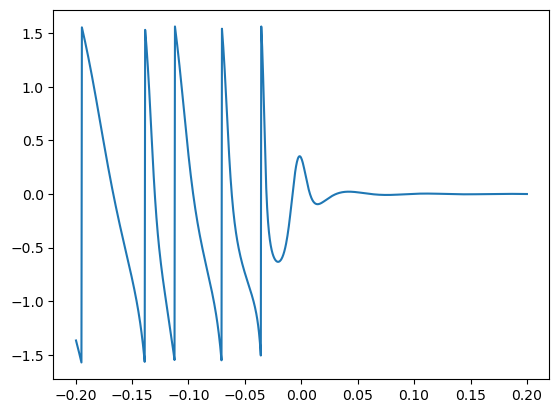

In [18]:
plt.plot(z,Phi_arctan1)

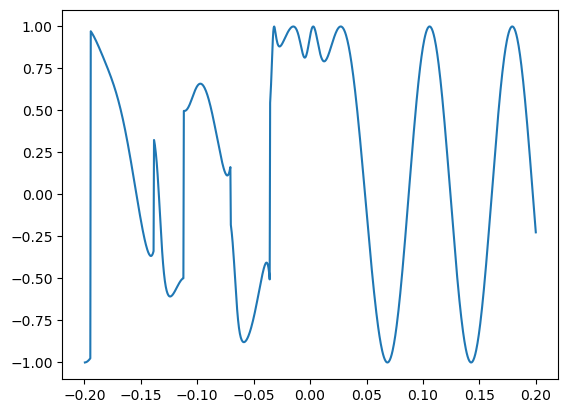

In [17]:
CosTerm = np.cos((2*z/b)-2*np.arctan(2*z/b)+Phi_arctan1)
plt.plot(z,CosTerm)
